# AUTOMOTIVE CRASH TESTING

## Problem Statement:
A crash test is a form of destructive testing that is performed in order to ensure high safety standards for various cars.
Several cars have rolled into independent audit unit for crash test.
They are being evaluated on a defined scale { Poor (-10) to Excellent (10) } on:
1. Manikin head(front) impact
2. Manikin body impact
3. Interior impact
4. Safety Alarm System
5. HVACi : Heating, ventilation, and air conditioning (HVAC)

![title](giphy.gif)

Each crash test is very expensive so crash test was performed only for 100 cars and after each test type of car (that is Hatchback or SUV ) was noted.However with this data in future they should able to predict the type of car.So to come with good model part of data is reserved for building model and remaining kept for analysis.<br/>
Data for 80 cars is given in crashTest_1.csv and data for remaining 20 cars is given in crashTest_1_Test.csv</br>
Use Logistic Regression classification techniq to classify the car types as Hatchback or SUV.



# Solution/Approach:

## 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Exploring Dataset

In [2]:
# importing csv files

train=pd.read_csv('crashTest_1.csv')
test=pd.read_csv('crashTest_1_Test.csv')

In [3]:
# give dimension of our dataframe

train.shape,test.shape

((80, 7), (20, 7))

In [4]:
# reading first five rows

train.head()

,CarID,ManHI,ManBI,IntI,HVACi,Safety,CarType
0,1,-5.27,-1.30,2.86,-4.85,4.04,SUV
1,2,-4.82,-5.38,9.72,-0.97,-4.57,Hatchback
2,3,9.57,-7.50,-7.61,1.33,-5.10,Hatchback
3,4,2.84,-2.85,0.92,5.51,-6.64,Hatchback
4,5,0.00,2.68,-4.15,0.85,5.58,SUV


In [5]:
test.head()

,CarID,ManHI,ManBI,IntI,HVACi,Safety,CarType
0,81,1.94,2.21,3.38,1.78,-7.19,Hatchback
1,82,-0.02,-3.33,0.79,-6.63,7.99,SUV
2,83,-0.49,-4.48,5.00,8.33,-2.77,Hatchback
3,84,5.76,1.35,7.92,-0.43,4.29,Hatchback
4,85,2.51,-8.74,4.53,-1.91,3.95,Hatchback


In [6]:
# checking datatypes of each of the column

train.dtypes

CarID        int64
ManHI      float64
ManBI      float64
IntI       float64
HVACi      float64
Safety     float64
CarType     object
dtype: object

## Observation: 

1. Out of these 7 features, 6 are continuous in nature and 1 is categorical in nature.
2. 'Car Type' is categorical is nature and this is the target variable
3. 'Car Id' is not consider for prediction purpose because it is unique for all the cars and doesn't contribute in prediction.

## Univariate Analysis:

In [7]:
# first for continuous variable

train.describe()

,CarID,ManHI,ManBI,IntI,HVACi,Safety
count,80.0000,80.000000,80.000000,80.000000,80.000000,80.00000
mean,40.5000,-0.093500,-0.927750,-0.134875,0.119750,0.54375
std,23.2379,5.802878,5.600224,5.797549,5.813306,5.79723
min,1.0000,-9.930000,-9.940000,-9.990000,-9.820000,-9.80000
25%,20.7500,-5.195000,-5.705000,-5.572500,-5.675000,-4.67750
50%,40.5000,0.635000,-1.815000,-0.415000,0.870000,0.83000
75%,60.2500,5.050000,3.417500,4.977500,5.062500,4.62250
max,80.0000,9.570000,9.610000,9.720000,9.890000,9.99000


In [8]:
test.describe()

,CarID,ManHI,ManBI,IntI,HVACi,Safety
count,20.00000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,90.50000,0.047000,0.32800,0.524000,0.723500,0.191000
std,5.91608,6.253216,4.05164,4.953771,5.479129,6.154548
min,81.00000,-9.940000,-8.74000,-8.950000,-9.230000,-8.660000
25%,85.75000,-5.535000,-2.50250,-3.272500,-2.455000,-6.095000
50%,90.50000,0.740000,0.67000,1.200000,0.675000,-0.770000
75%,95.25000,5.110000,2.50000,3.907500,5.337500,4.992500
max,100.00000,9.090000,8.42000,8.870000,8.330000,9.620000


## Observation: 

1. Each of the variable have minimum value around -9 and maximum value around +9
2. Almost each of the variable, <b>Q3</b> has value around 5

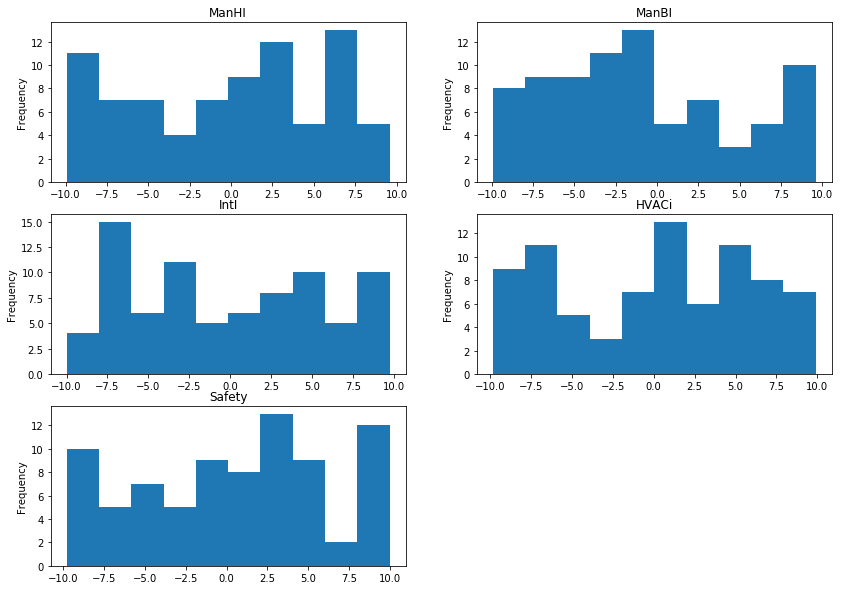

In [9]:
# plotting hist plot to know frequency and distribution of values

plt.figure(1)

plt.subplot(321)
plt.title('ManHI')
train['ManHI'].plot.hist(figsize=(14,10))

plt.subplot(322)
plt.title('ManBI')
train['ManBI'].plot.hist()

plt.subplot(323)
plt.title('IntI')
train['IntI'].plot.hist()

plt.subplot(324)
plt.title('HVACi')
train['HVACi'].plot.hist()

plt.subplot(325)
plt.title('Safety')
train['Safety'].plot.hist()

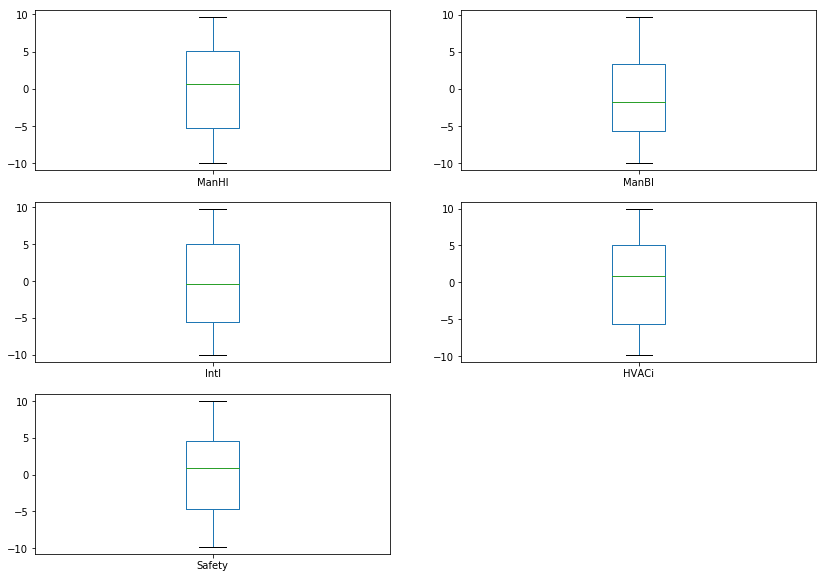

In [10]:
# now plotting box plot to detect any outliers and also checking right or left skew

plt.figure(1)

plt.subplot(321)
train['ManHI'].plot.box(figsize=(14,10))

plt.subplot(322)
train['ManBI'].plot.box()

plt.subplot(323)
train['IntI'].plot.box()

plt.subplot(324)
train['HVACi'].plot.box()

plt.subplot(325)
train['Safety'].plot.box()

## Observation: 
1. There is no outliers,we can see directly in all box plot as there is no point below Q1 and above Q3
2. 'ManHI','HVACi','Safety' are <b>right skew</b> because Q2 is closer to Q3
3. 'ManBI' is <b>left skew</b> because <b>Q2 is closer to Q1</b>
4. 'IntI' is <b>symetrically distributed</b>

In [11]:
# categorical variable

train.isnull().sum()

CarID      0
ManHI      0
ManBI      0
IntI       0
HVACi      0
Safety     0
CarType    0
dtype: int64

In [12]:
test.isnull().sum()

CarID      0
ManHI      0
ManBI      0
IntI       0
HVACi      0
Safety     0
CarType    0
dtype: int64

## Observation:
1. There is no <b>missing value</b> in any of the columns of both train and test data set

In [13]:
train['CarType'].value_counts()

Hatchback    50
SUV          30
Name: CarType, dtype: int64

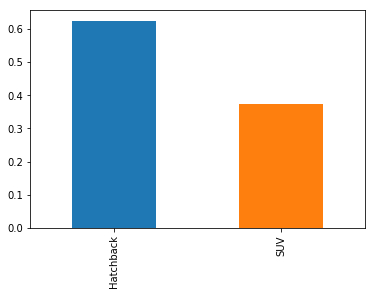

In [14]:
train['CarType'].value_counts(normalize=True).plot.bar()

## Observation: 
1. Out of 80 observation( target variable ),62.5 % of car belong to Hatchback.

## Bivariate Analysis:

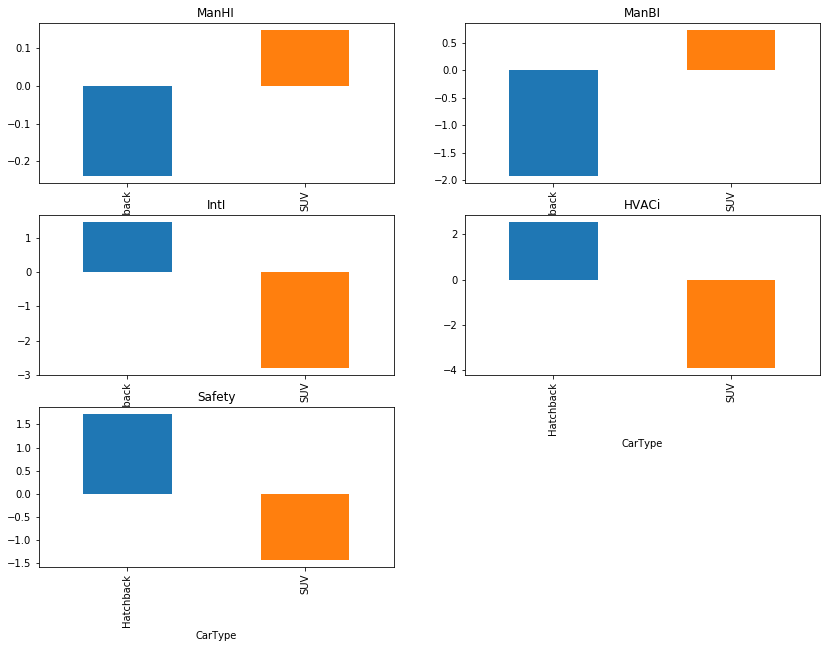

In [15]:
plt.figure(3)

plt.subplot(321)
plt.title('ManHI')
train.groupby('CarType')['ManHI'].mean().plot.bar(figsize=(14,10))

plt.subplot(322)
plt.title('ManBI')
train.groupby('CarType')['ManBI'].mean().plot.bar()

plt.subplot(323)
plt.title('IntI')
train.groupby('CarType')['IntI'].mean().plot.bar()

plt.subplot(324)
plt.title('HVACi')
train.groupby('CarType')['HVACi'].mean().plot.bar()

plt.subplot(325)
plt.title('Safety')
train.groupby('CarType')['Safety'].mean().plot.bar()

## Observation:
1. We have already observed that out of 80 observation ,60 of them belongs to Hatchback

# Note: 
1. As we have already observed there is no <b>missing values</b> and there is no <b>outliers</b> so there is no requirement of these two steps (i.e Missing value Treatment and Outliers Treatment )

## Modeling:

In [16]:
train.replace('Hatchback',0,inplace=True)
train.replace('SUV',1,inplace=True)

In [17]:
# separating independent and independent variable

X=train.iloc[:, 1:6].values
y=train.iloc[:,6].values
y

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [18]:
X.shape,y.shape

((80, 5), (80,))

In [19]:
# now spilliting the train data set

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(64, 5)
(16, 5)
(64,)
(16,)


In [20]:
# fitting the model

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
# predicting the values

y_pred=lr.predict(X_test)

In [22]:
# checking accuracy

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.875

In [23]:
# now predicting for test data set

new_test=test.drop(['CarID','CarType'],axis=1)
new_test

,ManHI,ManBI,IntI,HVACi,Safety
0,1.94,2.21,3.38,1.78,-7.19
1,-0.02,-3.33,0.79,-6.63,7.99
2,-0.49,-4.48,5.00,8.33,-2.77
3,5.76,1.35,7.92,-0.43,4.29
4,2.51,-8.74,4.53,-1.91,3.95
5,-4.47,8.42,-0.05,5.57,9.62
6,-9.89,-2.25,-5.00,-9.23,9.38
7,-9.94,-3.23,2.81,-2.98,-1.12
8,-8.37,4.21,-8.95,6.66,7.34
9,8.48,0.38,-3.02,-1.92,-7.43


In [24]:
# now predicting on this set

new_y_pred=lr.predict(new_test)

In [25]:
test['New_CarType']=new_y_pred

In [26]:
test['New_CarType'].replace(0,'Hatchback',inplace=True)
test['New_CarType'].replace(1,'SUV',inplace=True)

In [27]:
test

,CarID,ManHI,ManBI,IntI,HVACi,Safety,CarType,New_CarType
0,81,1.94,2.21,3.38,1.78,-7.19,Hatchback,Hatchback
1,82,-0.02,-3.33,0.79,-6.63,7.99,SUV,Hatchback
2,83,-0.49,-4.48,5.00,8.33,-2.77,Hatchback,Hatchback
3,84,5.76,1.35,7.92,-0.43,4.29,Hatchback,Hatchback
4,85,2.51,-8.74,4.53,-1.91,3.95,Hatchback,Hatchback
5,86,-4.47,8.42,-0.05,5.57,9.62,Hatchback,Hatchback
6,87,-9.89,-2.25,-5.00,-9.23,9.38,SUV,SUV
7,88,-9.94,-3.23,2.81,-2.98,-1.12,SUV,SUV
8,89,-8.37,4.21,-8.95,6.66,7.34,SUV,SUV
9,90,8.48,0.38,-3.02,-1.92,-7.43,SUV,SUV


## Observation:
1. From above table we can observe from last two columns(i.e CarType and new_CarType), only one value has incorrect prediction so <b>accuracy on final test data is 95%</b>